## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [44]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [45]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [46]:
print('Number of rows: {}.'.format(df.shape[0]))

Number of rows: 294478.


c. The number of unique users in the dataset.

In [47]:
print('Number of unique users: {}'.format(df.user_id.nunique()))

Number of unique users: 290584


d. The proportion of users converted.

In [48]:
converted_mean=df.converted.mean()*100
print('Proportion of users converted: {}%'.format(converted_mean))

Proportion of users converted: 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't match.

In [49]:
no_match = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print('Number of times the new_page and treatment do not match: {}'.format(no_match))

Number of times the new_page and treatment do not match: 3893


f. Do any of the rows have missing values?

In [50]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No, none of the rows have missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [51]:
df2=df.copy()
df2=df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) != False]

In [52]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [53]:
print('Number of unique users: {}'.format(df2.user_id.nunique()))

Number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [54]:
dup_id=df2[(df2['user_id'].duplicated())].iloc[0]
print('The duplicated Id is: {}'.format(dup_id))

The duplicated Id is: user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2893, dtype: object


c. What is the row information for the repeat **user_id**? 

In [55]:
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [56]:
df2=df2.drop(2893)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [57]:
prop = (len(df2[(df2['converted'] == 1)]))/df2.shape[0]
print('Probability of an individual converting regardless of the page they receive: {}'.format(prop))

Probability of an individual converting regardless of the page they receive: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [58]:
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [60]:
(df2.query("landing_page == 'new_page'").shape[0])/df2.landing_page.shape[0]


0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The conversion rate of the control group is slightly more than the conversion rate of the treatment. Therefore there is not much difference/ evidence that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: p_new-p_old<=0    and    
H1: p_new-p_old>0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [61]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [62]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [63]:
n_new=df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [64]:
n_old=df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [65]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [66]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [67]:
new_page_converted.mean() - old_page_converted.mean()

0.00071090218402014571

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [68]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Value of Simulations')

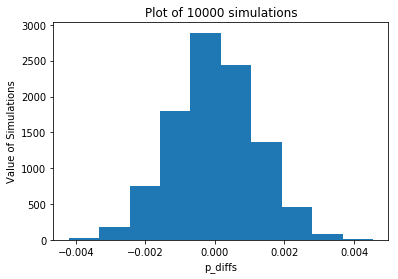

In [69]:
plt.hist(p_diffs)
plt.title('Plot of 10000 simulations')
plt.xlabel('p_diffs')
plt.ylabel('Value of Simulations')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [70]:
p_diffs = np.array(p_diffs)
new_diffs= df2.query("group =='treatment'").converted.mean() - df2.query("group =='control'").converted.mean()
(p_diffs>new_diffs).mean()

0.90449999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

ANS: The value we calculated is called as the p-value.
Here first we converted the p_diffs into numpy array.
Then we calculated the difference of the mean values between the treatments group and control group. We stored it in new_diffs.
Nextly, we calculated the mean for all the p_diffs values which are greater than the new_diffs.

For accepting the null hypothesis, the p-value should be greater than the p-value which we got. According to our observation, the new page is not better than the old page. The old page is doing good. As a result, we should go with the null hypothesis and reject the alternative hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [71]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group =='treatment'").converted.sum()
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [72]:
z_score, p_value= sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print('z-score: {}   p-value: {}'.format(z_score,p_value))

z-score: 1.3109241984234394   p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score is 1.31 and the p-value is 0.905. 
Yes, the z-score and p-value agree with the findings in part j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression can be used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [73]:
df2['intercept'] =1
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [74]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results= mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [75]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-22 10:29 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.1899.
Firstly, we calculate the probability receiving a observed statistic if the null hypothesis is true. However, the ab_page p-value is the result of a two sided test, because the null hypothesis for this case is, that there is no significant relationship between the conversion rate and ab_page. Therefore give us a variable with a low p value "a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable".

tHere, the conversion is not significant dependent on the page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other features to consider are:
Extracts of the time stamp 
Disadvantages: 
Increasing complexity of interpretation

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [76]:
data_countries = pd.read_csv('countries.csv')
data_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [77]:
data_log = df2.copy()
data_log.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [78]:
data_log_countries = data_log.merge(data_countries,on="user_id",how = "left")
data_log_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [79]:
data_log_countries = data_log_countries.join(pd.get_dummies(data_log_countries['country']))
data_log_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [80]:
Y = data_log_countries["converted"]
X = data_log_countries[["intercept","ab_page","CA","UK","US"]]
log_mod = sm.Logit(Y,X)
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             No. Iterations:    11.0000    
Dependent Variable:  converted         Pseudo R-squared:  0.000      
Date:                2020-06-22 10:29  AIC:               212781.1253
No. Observations:    290584            BIC:               212823.4439
Df Model:            3                 Log-Likelihood:    -1.0639e+05
Df Residuals:        290580            LL-Null:           -1.0639e+05
Converged:           1.0000            Scale:             1.0000     
---------------------------------------------------------------------
           Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
---------------------------------------------------------------------
intercept -1.4997 222699.3901 -0.0000 1.0000 -436484.2836 436481.2842
ab_page   -0.0149      0.0114 -1.3069 0.1912      -0.0374      0.0075
CA        -0.5304 222699.3901 -0.0000 1.0000 -436483.3143 436482.2535
UK        -0.4797 222699.3901 -0.0000 1.0000 -436483.2636 436482.3042
US        -0.4896 222699.3901 -0.0000 1.0000 -436483.2735 436482.2943
=====================================================================

"""

In [81]:
data_log_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [82]:
data_log_countries["CA_page"],data_log_countries["UK_page"] = data_log_countries["ab_page"],data_log_countries["UK"] * data_log_countries["ab_page"]
data_log_countries.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [89]:
Y = data_log_countries["converted"]
X = data_log_countries[["intercept","ab_page","CA","UK","CA_page"]]
log_mods = sm.Logit(Y,X)
results = log_mods.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                 Logit             No. Iterations:    6.0000     
Dependent Variable:    converted         Pseudo R-squared:  0.000      
Date:                  2020-06-22 10:35  AIC:               212781.1253
No. Observations:      290584            BIC:               212823.4439
Df Model:              3                 Log-Likelihood:    -1.0639e+05
Df Residuals:          290580            LL-Null:           -1.0639e+05
Converged:             1.0000            Scale:             1.0000     
-----------------------------------------------------------------------
           Coef.    Std.Err.      z     P>|z|     [0.025       0.975]  
-----------------------------------------------------------------------
intercept -1.9893      0.0089 -223.7628 0.0000      -2.0067     -1.9718
ab_page   -0.0075 352118.6531   -0.0000 1.0000 -690139.8858 690139.8708
CA        -0.0408      0.0269   -1.5161 0.1295      -0.0934      0.0119
UK         0.0099      0.0133    0.7433 0.4573      -0.0162      0.0359
CA_page   -0.0075 352118.6531   -0.0000 1.0000 -690139.8858 690139.8708
=======================================================================

"""

In [90]:
Y = data_log_countries["converted"]
X = data_log_countries[["intercept","ab_page","CA","UK","UK_page"]]
log_mods = sm.Logit(Y,X)
results = log_mods.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-22 10:36 AIC:              212781.4204
No. Observations:   290584           BIC:              212834.3187
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9850    0.0095  -209.6902  0.0000  -2.0035  -1.9664
ab_page      -0.0236    0.0132    -1.7853  0.0742  -0.0495   0.0023
CA           -0.0407    0.0269    -1.5151  0.1298  -0.0934   0.0120
UK           -0.0072    0.0187    -0.3873  0.6985  -0.0439   0.0294
UK_page       0.0344    0.0264     1.3057  0.1917  -0.0172   0.0861
==================================================================

"""

# Overall Conclusion:

From the above results we can see that p-values for interaction terms are not significant and decreases the significance of former 'CA' and 'UK' columns. There is no evidence that the new_page is affecting the conversion rates. The company should not implement the idea of new_page as there is no evidence that it is performing better than the old_page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])